## **Importing Required Libraries and Loading Data**

**In this section, several essential Python libraries are imported to handle data processing and visualization tasks.**


1.  pandas (pd): Used for data manipulation and analysis, particularly for working with structured data in DataFrames.

1.   numpy (np): Provides support for numerical operations and handling large arrays efficiently.
2.   matplotlib.pyplot (plt): Used to create a wide range of static, animated, and interactive visualizations.


2.   seaborn (sns): A higher-level interface built on top of Matplotlib for creating visually appealing statistical graphics.

After importing the libraries, the dataset named ‘GoAutoServices’ is loaded using the pandas.read_csv() function. This reads the data into a DataFrame named "df".

To ensure the original dataset remains unchanged during data cleaning and analysis, a duplicate of the DataFrame is created and stored in a new variable df1_clean. This copy serves as the working dataset for all preprocessing and analysis steps that follow.



In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('GoAutoServices')

In [ ]:
#making copy of original data to work on
df1_clean = df.copy()

# **Performing Sanity Checks on the Dataset**

Before proceeding with analysis, it's important to perform a sanity check to understand the dataset's structure, identify missing or duplicate values, and detect any inconsistent or “garbage” entries.



1.   Checking Data Dimensions:
The command df1_clean.shape returns the number of rows and columns in the dataset. This helps verify whether the data was loaded correctly.
2.   Examining Data Structure:
Using df1_clean.info(), we can view a concise summary of the dataset — including column names, data types, and the count of non-null values. This gives an overview of the completeness and format of the data.


1.   Identifying Missing Values:
The code df1_clean.isnull().sum().sort_values(ascending=False) calculates the total number of missing values in each column, sorted from most to least.
To better understand the scale of missing data, the next line calculates the percentage of missing values using:



*   df1_clean.isnull().sum() / df1_clean.shape[0] * 100


4.   Detecting Duplicates:
The line df1_clean.duplicated().sum() identifies how many rows in the dataset are exact duplicates. Removing or handling duplicates prevents data distortion in later analyses.


1.   Identifying Garbage or Invalid Values:
The for loop iterates through all columns with an object (string) data type and prints the count of each unique value. This helps spot inconsistent entries such as typos, unexpected symbols, or irrelevant text that need correction.
2.   Analyzing Cost Column:
Finally, df1_clean['cost'].value_counts() displays the frequency of each unique value in the cost column, which helps in understanding the distribution and identifying potential anomalies in cost data.










In [ ]:
df1_clean.shape

(242818, 14)

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242818 entries, 0 to 242817
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   service_date  242818 non-null  object 
 1   sale_date     242818 non-null  object 
 2   customer_pay  242818 non-null  int64  
 3   warranty_pay  242818 non-null  int64  
 4   year          242818 non-null  int64  
 5   make          242818 non-null  object 
 6   model         242818 non-null  object 
 7   vin           242818 non-null  int64  
 8   loyalty_card  242813 non-null  object 
 9   cost          240095 non-null  object 
 10  appointment   242818 non-null  bool   
 11  mileage       242818 non-null  int64  
 12  dealer_name   242818 non-null  object 
 13  distance      242818 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 24.3+ MB


In [ ]:
df1_clean.isnull().sum().sort_values(ascending=False)

,0
cost,2723
loyalty_card,5
customer_pay,0
warranty_pay,0
service_date,0
sale_date,0
make,0
year,0
vin,0
model,0


In [ ]:
#finding percentage of missing values in each column
df1_clean.isnull().sum()/df1_clean.shape[0]*100

,0
service_date,0.000000
sale_date,0.000000
customer_pay,0.000000
warranty_pay,0.000000
year,0.000000
make,0.000000
model,0.000000
vin,0.000000
loyalty_card,0.002059
cost,1.121416


In [ ]:
#finding duplicates
df1_clean.duplicated().sum()

np.int64(4)

In [ ]:
#identifying garbage values
for i in df1_clean.select_dtypes(include='object').columns:
        print(df1_clean[i].value_counts())
        print("****"*10)

service_date
2024-07-02 00:00:00    449
2024-07-01 00:00:00    329
2024-07-03 00:00:00    316
2020-10-27 00:00:00    315
2024-10-28 00:00:00    309
                      ... 
2023-08-17 00:00:00      1
2023-05-25 00:00:00      1
2021-03-18 00:00:00      1
2024-12-26 00:00:00      1
2020-04-23 00:00:00      1
Name: count, Length: 1543, dtype: int64
****************************************
sale_date
May 2019    3822
Mar 2019    3815
Aug 2019    3751
Aug 2020    3732
Sep 2019    3719
            ... 
Jun 2010      87
Feb 2010      84
Mar 2010      75
Jan 2010      64
Dec 2024      43
Name: count, Length: 180, dtype: int64
****************************************
make
HOND     48795
VW       40586
TOYO     38655
FORD     37838
NISS     28492
         ...  
ALFA         1
ROLL         1
MCLAR        1
INTL         1
GENES        1
Name: count, Length: 66, dtype: int64
****************************************
model
CRV       17082
F150      14601
ROGUE      9481
TIGU       8909
ESCA       84

In [ ]:
#get count of each unique value in cost
df1_clean['cost'].value_counts()

,count
cost,
100-200,51747
0-100,50140
200-300,31341
300-400,22212
400-500,14700
...,...
19300-19400,1
30700-30800,1
17500-17600,1


# **Exploratory Data Analysis (EDA)**

This section focuses on exploring, understanding, and preparing the dataset for further analysis. The process involves summarizing data characteristics, handling missing or inconsistent values, cleaning textual data, and visualizing numerical patterns.



1.   Summary Statistics:


*   The describe() function is used twice — once with include='number' to view statistical summaries (mean, median, standard deviation, etc.) for numerical columns, and again with include='object' for categorical data.
*   This helps identify potential outliers, data entry errors, and the overall spread of the dataset.


2.   Data Distribution Visualization:


*   Histograms are plotted for all numerical features using Seaborn’s histplot() to visualize the frequency distribution of values.
*   These visualizations help detect skewed distributions or unusual data patterns.


3.   Data Type Conversion:


*   The columns service_date and sale_date are converted to datetime format to enable accurate date-based calculations.
*   The cost column, which originally contained range values (e.g., “1000-2000”), is transformed into numeric form by calculating the midpoint of each range using a custom function convert_cost().

4.   Outlier Detection and Visualization:


*   Boxplots are used to visualize potential outliers across all numeric columns.
*   A correlation heatmap is then generated to understand relationships between numeric variables, helping identify which features are strongly related.





5.   Data Cleaning:


*   Missing values in the cost column are removed to maintain accuracy in later analysis.
*   Brand names in the make column are standardized using a mapping dictionary that corrects misspelled or abbreviated entries (e.g., “MERZ” → “MERCEDES”, “LANDR” → “LANDROVER”).


6.   Categorizing Vehicle Types:


*   A list of known luxury brands is defined, and a Boolean column is_luxury is created to classify vehicles as luxury or regular.
*   This enables comparison of service behavior between luxury and non-luxury vehicles.

7.   Service Interval Analysis:


*   The dataset is sorted by vin (vehicle ID) and service_date to track each vehicle's service history chronologically.
*   Using the groupby() and shift() functions, the next service date for each vehicle is calculated, and the time interval between services is derived both in days and months.



8.   Custom Insight Function:


*   The function vehicle_make_info() provides detailed insights for a selected vehicle brand. It was used to get insight, not part of the project.
It prints summary statistics like average service interval, cost, mileage, and top dealerships, and visualizes the service interval distribution through a histogram.
** For Example:- vehicle_make_info(df1_clean, "FERRARI")



9.   Outlier Treatment:


*   Outliers are capped using the Interquartile Range (IQR) method.
Two different thresholds (2.5xIQR and 1.5xIQR) are applied depending on the variable.
*   The whisker() function calculates the lower and upper bounds, ensuring extreme values do not distort the analysis.



10.   Final Data Cleaning:


*   All remaining missing values are dropped, ensuring a clean, consistent dataset.
*   The column interval_in_days is removed after converting its data into months.
*   Boxplots are re-plotted post-cleaning to confirm that outliers have been properly handled.

11.   Dealership Service Count:
Finally, the total number of services completed by each dealership is calculated using:
service_count = df1_clean.groupby('dealer_name')['vin'].count()



















In [ ]:
df1_clean.describe(include='number')

,customer_pay,warranty_pay,year,vin,mileage,distance
count,242818.000000,242818.000000,242818.000000,2.428180e+05,2.428180e+05,242818.000000
mean,0.841910,0.382365,2018.015135,5.508742e+09,6.689293e+04,43.090641
std,0.364826,0.485966,3.187028,2.587574e+09,6.255440e+04,155.906911
min,0.000000,0.000000,1985.000000,1.000168e+09,0.000000e+00,0.000000
25%,1.000000,0.000000,2016.000000,3.277858e+09,2.398500e+04,5.800000
50%,1.000000,0.000000,2018.000000,5.532262e+09,5.212800e+04,10.600000
75%,1.000000,1.000000,2020.000000,7.728695e+09,9.496775e+04,18.900000
max,1.000000,1.000000,2025.000000,9.999990e+09,1.000000e+07,4212.200000


In [ ]:
df1_clean.describe(include='object')

,service_date,sale_date,make,model,loyalty_card,cost,dealer_name
count,242818,242818,242818,242818,242813,240095,242818
unique,1543,180,66,896,2,253,7
top,2024-07-02 00:00:00,May 2019,HOND,CRV,No,100-200,Go Honda
freq,449,3822,48795,17082,199839,51747,49942


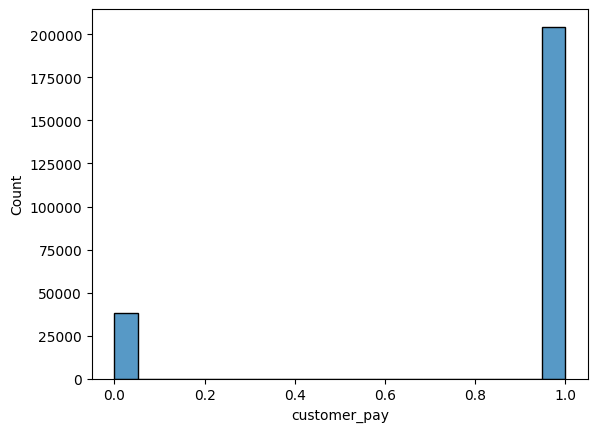

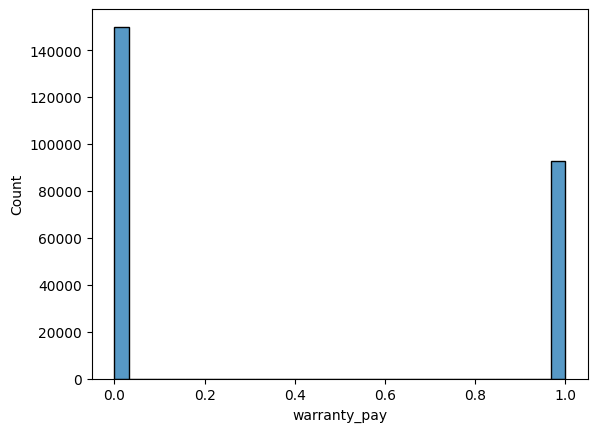

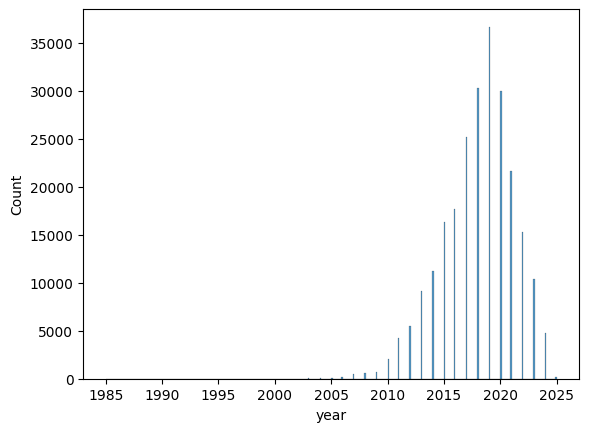

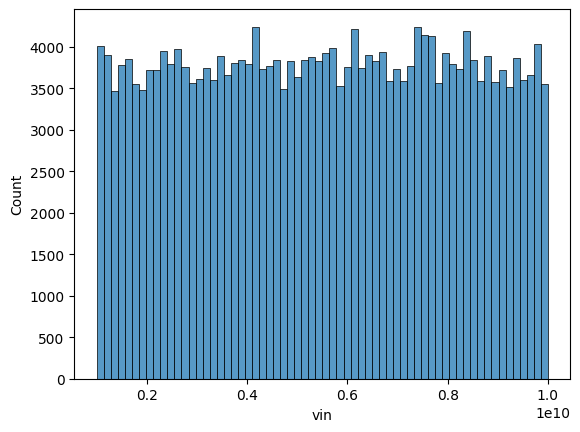

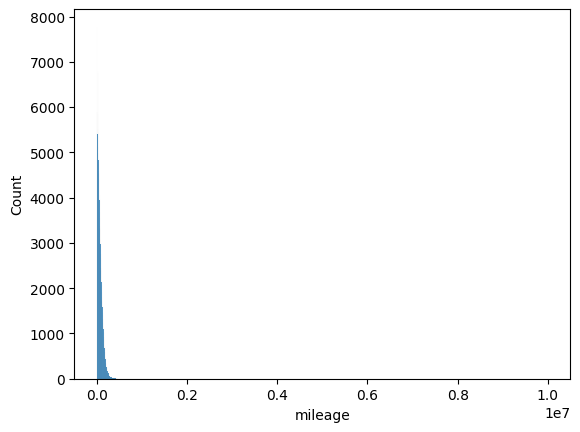

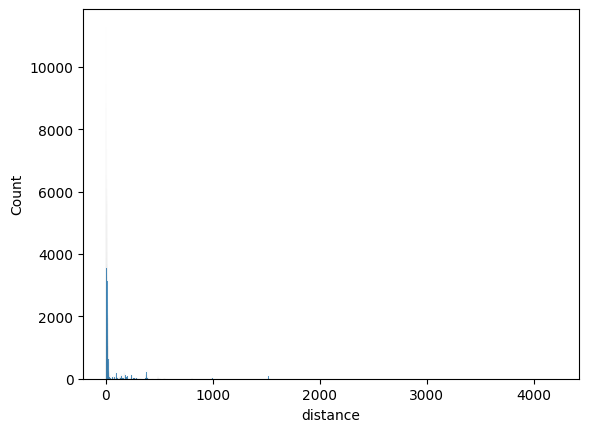

In [ ]:
#plotting histogram to understan distributuion
for i in df1_clean.select_dtypes(include='number').columns:
  sns.histplot(df1_clean[i])
  plt.show()

In [ ]:
#convert date columns to date time
df1_clean['service_date'] = pd.to_datetime(df1_clean['service_date'], format= 'mixed')
df1_clean['sale_date'] = pd.to_datetime(df1_clean['sale_date'], format = 'mixed')

In [ ]:
#convert cost column into numeric midpoint values from range values
def convert_cost(cost_str):
    if pd.isnull(cost_str):
        return None
    try:
       lower, upper = map(int, cost_str.split('-'))
       return (lower + upper) / 2
    except (ValueError, TypeError):
       return None
df1_clean['cost'] = df1_clean['cost'].apply(convert_cost)

In [ ]:
df1_clean['cost'].value_counts()

,count
cost,
150.0,51747
50.0,50140
250.0,31341
350.0,22212
450.0,14700
...,...
19350.0,1
30750.0,1
17550.0,1


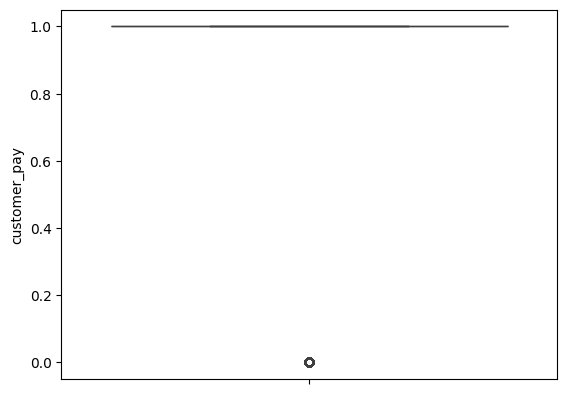

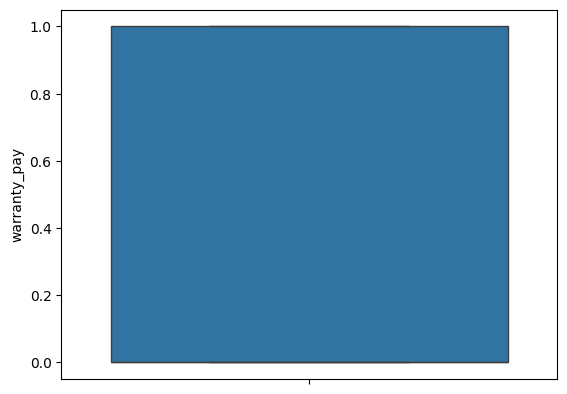

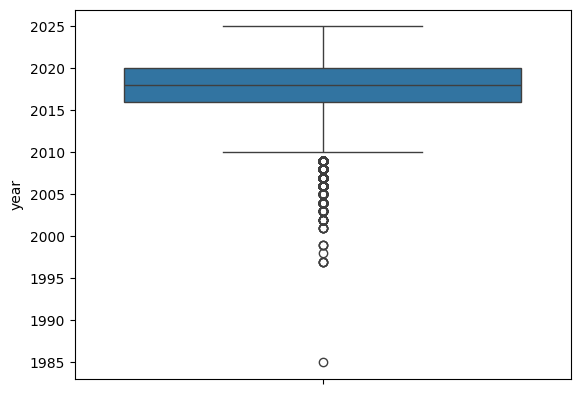

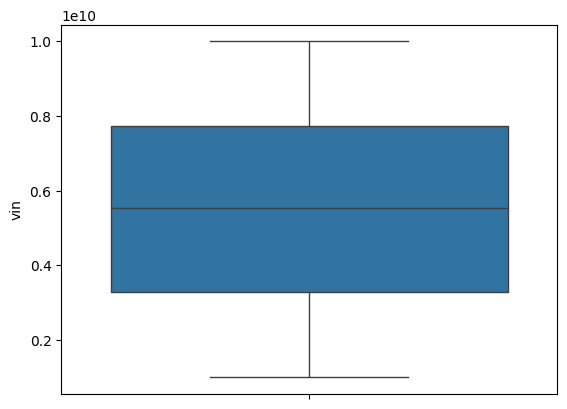

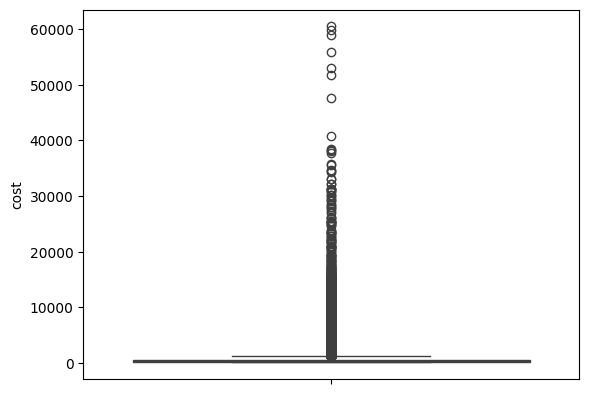

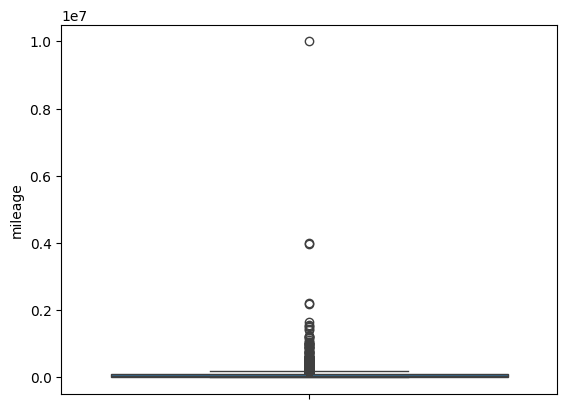

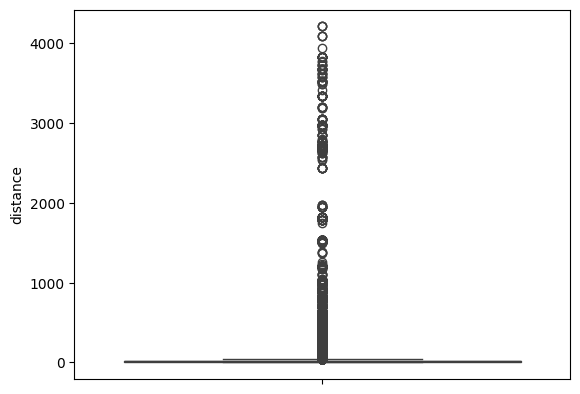

In [ ]:
for i in df1_clean.select_dtypes(include='number').columns:
  sns.boxplot(df1_clean[i])
  plt.show()

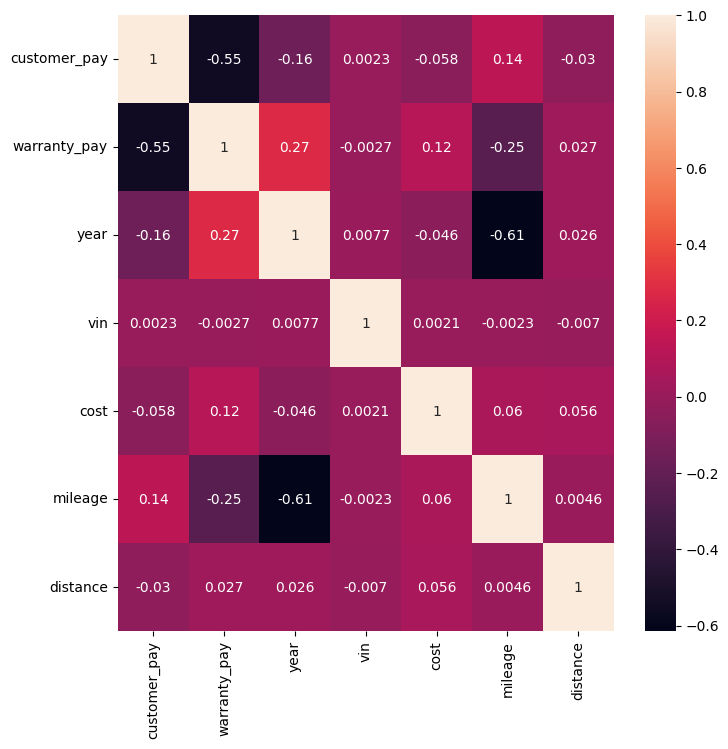

In [ ]:
#heatmap for correaltion matrix for data
heatmap = df1_clean.select_dtypes(include='number').corr()
plt.figure(figsize=(8,8))
sns.heatmap(heatmap, annot=True)
plt.show()

In [ ]:
df1_clean['make'].value_counts()


,count
make,
HOND,48795
VW,40586
TOYO,38655
FORD,37838
NISS,28492
...,...
ALFA,1
ROLL,1
MCLAR,1


In [ ]:
#drop na values from cost
df1_clean.dropna(subset=['cost'], inplace=True)
df1_clean.isnull().sum().sort_values(ascending=False)

,0
loyalty_card,5
service_date,0
customer_pay,0
warranty_pay,0
year,0
sale_date,0
make,0
model,0
vin,0
cost,0


In [ ]:
#correcting brand names by replace
brand_name_mapping = {
    'ACUR': 'ACURA','BENT':'BENTLY','CADI':'CADILLAC','FERR':'FERRARI','GEN':'GENESIS','GENE':'GENESIS','GENES':'GENESIS','INFI':'INFINITY',
    'JAGU':'JAGUAR','LEXU':'LEXUS','LAMB':'LAMBORGINI','LAND':'LANDROVER','LANDR':'LANDROVER','LANDRO':'LANDROVER','LROVER':'LANDROVER'
    ,'MB':'MERCEDES','MERZ':'MERCEDES','MER':'MERCEDES','BENZ':'MERCEDES','MERC':'MERCEDES','PORS':'PORSCHE','ROLL':'RR','ASTO':'ASTONMARTIN',
    'ROVE':'LANDROVER','ROVR':'LANDROVER','MCLAR':'MCLAREN','HUMM':'HUMMER','MINI':'MINICOOPER','ALFA':'ALFAROMEO','LANDROVER':'LANDROVER',
    'TOYO':'TOYOTA','NISS':'NISSAN','HOND':'HONDA', 'HYUN':'HYUNDAI','RAMT':'RAM','DODG':'DODGE','LAN':'LANDROVER','INTL':'MAZDA',
                             'MAZD':'MAZDA','CHEV':'CHEVORLET','CHRY':'CHRYSLER','LINC':'LINCOLN','BUIC':'BUICK','PONT':'PONTIAC','MLT':'LINCOLN',
                             'SUBA':'SUBARU','MITS':'MITSBUSHI','SMAR':'MARUTISUZUKI','FORD':'FORD','SUZU':'MARUTISUZUKI','VOLV':'VOLVO','ARCT':'ARCTIC MOTORS'}




In [ ]:
df1_clean['full_name']= df1_clean['make'].replace(brand_name_mapping)

In [ ]:
#defining luxury and regular cars brand from make column
luxury_brands =['ACUR','AUDI','BENT', 'BMW','CADI','FERR','GEN','GENE','INFI','JAGU','LEXU','LAMB',
             'LAND','LANDR','LANDRO','LROVER','MB','MERZ','MER','BENZ','MERCE','MERC','PORS','ROLL','TESLA','VOLVO','ASTO',
             'ROVE','ROVR','MCLAR','HUMM','MINI','ALFA','LANDROVER']

In [ ]:
#create new column
df1_clean['is_luxury'] = df1_clean['make'].isin(luxury_brands)

In [ ]:
df1_clean['dealer_name'].unique()

array(['Toyota on the Trail', 'Jaguar Land Rover Edmonton',
       'Go Nissan South', 'Kentwood Ford', 'Go Honda',
       'Norden Volkswagen', 'Porsche Centre Edmonton'], dtype=object)

In [ ]:
df1_clean['full_name'].unique()

array(['TOYOTA', 'LANDROVER', 'NISSAN', 'FORD', 'HONDA', 'HYUNDAI',
       'INFINITY', 'VW', 'RAM', 'DODGE', 'JEEP', 'KIA', 'MAZDA',
       'PORSCHE', 'JAGUAR', 'CHEVORLET', 'CHRYSLER', 'LINCOLN', 'AUDI',
       'GMC', 'ACURA', 'SUBARU', 'LEXUS', 'BUICK', 'MERCEDES', 'PONTIAC',
       'CADILLAC', 'MARUTISUZUKI', 'MERCE', 'HUMMER', 'BENTLY', 'TESLA',
       'FERRARI', 'LAMBORGINI', 'ASTONMARTIN', 'ARCTIC MOTORS', 'VOLVO',
       'SATU', 'MINICOOPER', 'BMW', 'FIAT', 'MITSBUSHI', 'GENESIS',
       'ALFAROMEO', 'RR', 'MCLAREN'], dtype=object)

In [ ]:
df1_clean['full_name'].value_counts()

,count
full_name,
HONDA,48685
VW,39359
FORD,37808
TOYOTA,37744
NISSAN,28246
LANDROVER,19155
PORSCHE,17073
JAGUAR,7001
HYUNDAI,581


In [ ]:
#sort by vehicle and service dates
df1_clean.sort_values(by=['vin', 'service_date'], inplace=True)

In [ ]:
#get service date for each vehicle using shift
df1_clean['next_service_date'] = df1_clean.groupby('vin')['service_date'].shift(-1)

In [ ]:
#calculate interval in days, then converting to months
df1_clean['interval_in_days'] = (df1_clean['next_service_date'] - df1_clean['service_date']).dt.days
df1_clean['interval_in_months'] = df1_clean['interval_in_days'] / 30

In [ ]:
#find null values in df1_clean
df1_clean.isnull().sum().sort_values(ascending=False)

,0
interval_in_days,54005
next_service_date,54005
interval_in_months,54005
loyalty_card,5
customer_pay,0
service_date,0
sale_date,0
model,0
warranty_pay,0
make,0


In [ ]:
def vehicle_make_info(df1_clean, full_name):
    """
    Show key statistics and insights for a given vehicle make.
    ---------------------------------------------------------
    Inputs:
        df : pandas DataFrame containing vehicle data
        make_name : str, vehicle make (case-insensitive)

    Output:
        Prints summary and returns subset dataframe for that make
    """
    import pandas as pd

    # Standardize make name (to match cleaned column)
    full_name = full_name.strip().title().upper()

    # Filter by make_full column
    subset = df1_clean[df1_clean['full_name'].str.upper() == full_name]

    if subset.empty:
        print(f" No data found for make: '{full_name}'. Check spelling or capitalization.")
        return None

    print(f" Summary for {full_name} vehicles:")
    print("-" * 60)
    print(f"Total Records: {len(subset)}")
    print(f"Luxury Brand: {subset['is_luxury'].iloc[0]}")
    print(f"Average Service Interval (Months): {subset['interval_in_months'].mean():.2f}")
    print(f"Average Mileage: {subset['mileage'].mean():,.0f}")
    print(f"Average Service Cost: {subset['cost'].mean():,.2f}")
    print(f"Average Distance to Dealer: {subset['distance'].mean():.2f}")
    print(f"Top 3 Dealerships:")
    print(subset['dealer_name'].value_counts().head(3))

    # Optional: quick visualization
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8,5))
    sns.histplot(subset['interval_in_months'], bins=range(1, 25), kde=True)
    plt.title(f'Service Interval Distribution for {full_name}')
    plt.xlabel('Service Interval (Months)')
    plt.ylabel('Number of Vehicles')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

    return subset


 Summary for RR vehicles:
------------------------------------------------------------
Total Records: 1
Luxury Brand: True
Average Service Interval (Months): nan
Average Mileage: 19,780
Average Service Cost: 550.00
Average Distance to Dealer: 14.90
Top 3 Dealerships:
dealer_name
Porsche Centre Edmonton    1
Name: count, dtype: int64


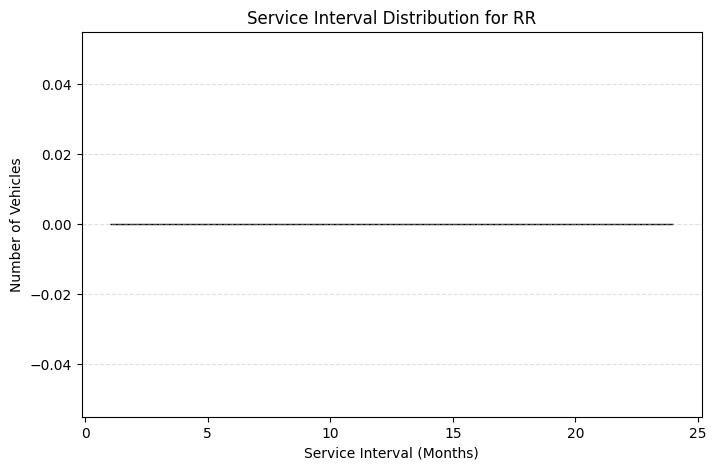

,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance,full_name,is_luxury,next_service_date,interval_in_days,interval_in_months
182818,2024-05-05,2024-03-01,1,0,2020,ROLL,WRAITH,8724005910,No,550.0,False,19780,Porsche Centre Edmonton,14.9,RR,True,NaT,NaN,NaN


In [ ]:

vehicle_make_info(df1_clean, "RR")


In [ ]:
#drop mssing values form df1_clean
df1_clean.dropna(inplace=True)

In [ ]:
#find missing values
df1_clean.isnull().sum().sort_values(ascending=False)

,0
service_date,0
sale_date,0
customer_pay,0
warranty_pay,0
year,0
make,0
model,0
vin,0
loyalty_card,0
cost,0


In [ ]:
df1_clean.shape

(186088, 19)

In [ ]:
#find luxury vehicles in full name
df1_clean[df1_clean['is_luxury']==True]['full_name'].value_counts()

,count
full_name,
LANDROVER,14982
PORSCHE,13831
JAGUAR,5449
AUDI,236
BMW,148
INFINITY,139
ACURA,135
MERCEDES,131
LEXUS,131


In [ ]:
#drop interval in days
df1_clean.drop('interval_in_days', axis=1, inplace=True)

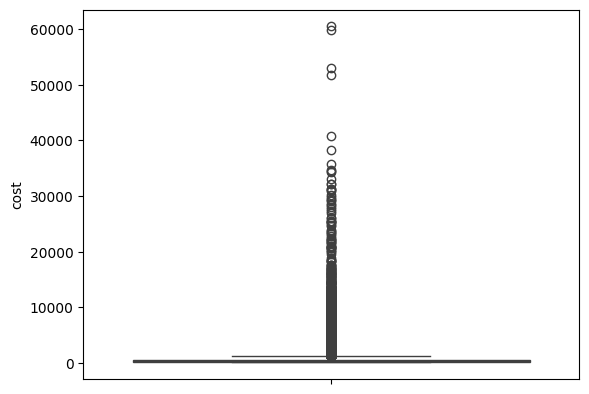

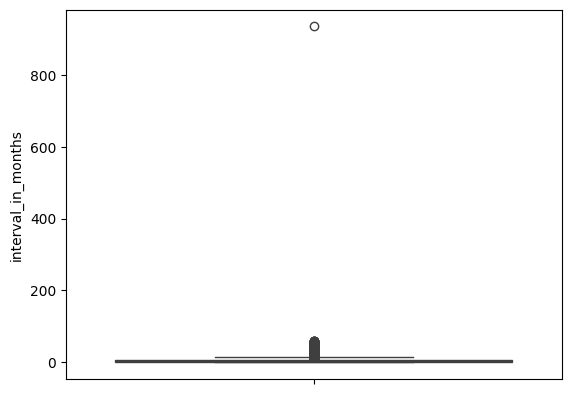

In [ ]:
for i in ['cost','interval_in_months']:
  sns.boxplot(df1_clean[i])
  plt.show()

In [ ]:
df1_clean.columns

Index(['service_date', 'sale_date', 'customer_pay', 'warranty_pay', 'year',
       'make', 'model', 'vin', 'loyalty_card', 'cost', 'appointment',
       'mileage', 'dealer_name', 'distance', 'full_name', 'is_luxury',
       'next_service_date', 'interval_in_months'],
      dtype='object')

In [ ]:
#treating outliers
def whisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw = q1 - (3.5*iqr)
  uw = q3 + (3.5*iqr)
  return lw,uw

In [ ]:
for i in ['cost','next_service_date','mileage','service_date', 'sale_date','distance']:
  lw,uw = whisker(df1_clean[i])
  df1_clean[i] = np.where(df1_clean[i]<lw,lw,df1_clean[i])
  df1_clean[i] = np.where(df1_clean[i]>uw,uw,df1_clean[i])


In [ ]:
def whisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw = q1 - (1.5*iqr)
  uw = q3 + (1.5*iqr)
  return lw,uw
for i in ["interval_in_months"]:
  lw,uw = whisker(df1_clean[i])
  df1_clean[i] = np.where(df1_clean[i]<lw,lw,df1_clean[i])
  df1_clean[i] = np.where(df1_clean[i]>uw,uw,df1_clean[i])

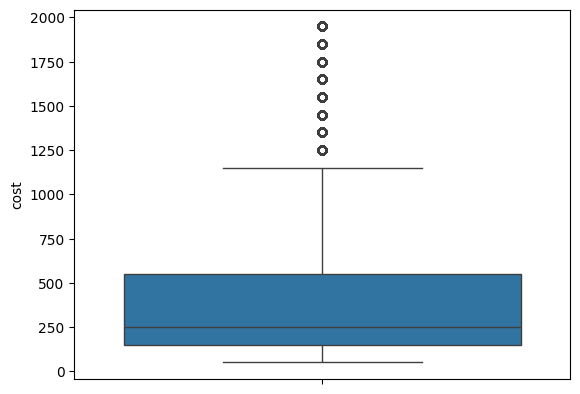

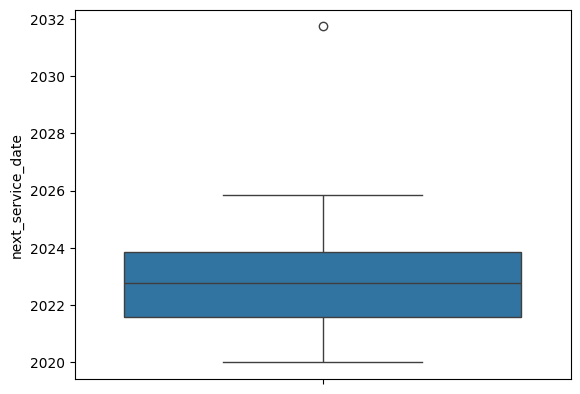

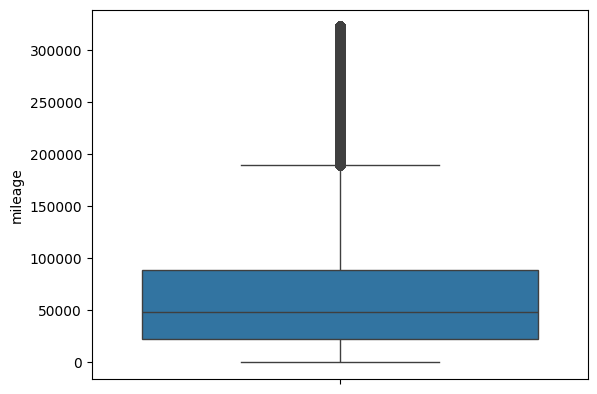

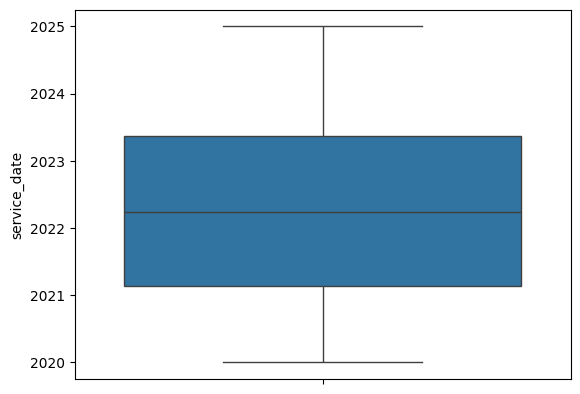

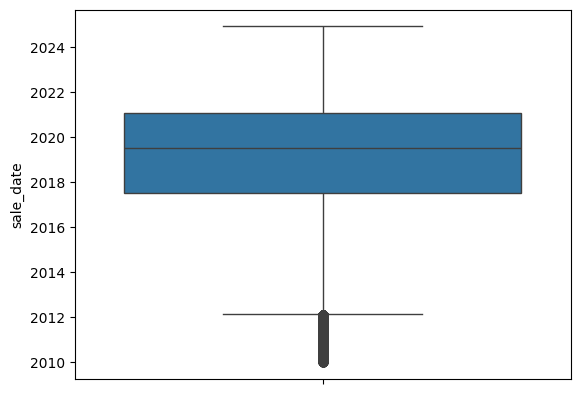

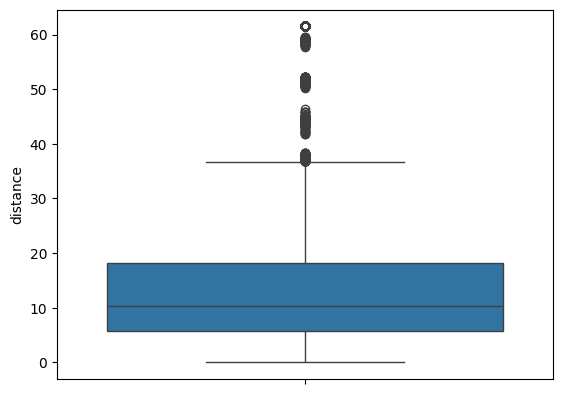

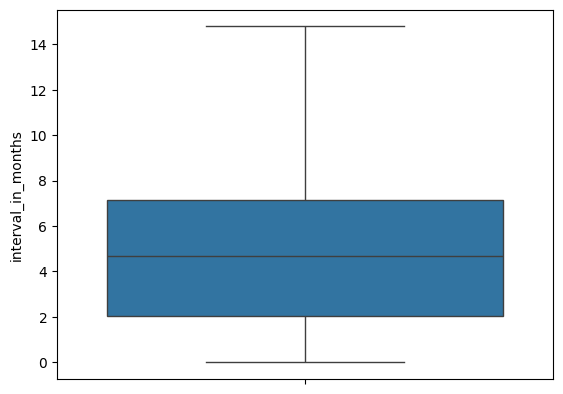

In [ ]:
for i in ['cost','next_service_date','mileage','service_date', 'sale_date','distance', 'interval_in_months']:
  sns.boxplot(df1_clean[i])
  plt.show()

In [ ]:
df1_clean['cost'].max()


1950.0

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186088 entries, 130345 to 235835
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   service_date        186088 non-null  datetime64[ns]
 1   sale_date           186088 non-null  datetime64[ns]
 2   customer_pay        186088 non-null  int64         
 3   warranty_pay        186088 non-null  int64         
 4   year                186088 non-null  int64         
 5   make                186088 non-null  object        
 6   model               186088 non-null  object        
 7   vin                 186088 non-null  int64         
 8   loyalty_card        186088 non-null  object        
 9   cost                186088 non-null  float64       
 10  appointment         186088 non-null  bool          
 11  mileage             186088 non-null  float64       
 12  dealer_name         186088 non-null  object        
 13  distance            186088 no

In [ ]:
#find number of services each dealership has done
service_count = df1_clean.groupby('dealer_name')['vin'].count()
print(service_count)

dealer_name
Go Honda                      39043
Go Nissan South               21883
Jaguar Land Rover Edmonton    20430
Kentwood Ford                 29257
Norden Volkswagen             31045
Porsche Centre Edmonton       13880
Toyota on the Trail           30550
Name: vin, dtype: int64


# **Data Visualization and Insights**

After cleaning and transforming the dataset, several visualizations were created to uncover key patterns and comparisons within the data. These plots help highlight relationships between service frequency, cost, dealership performance, and vehicle type.

1. Service Intervals by Luxury and Regular Brands:
*  The dataset was divided into luxury and regular vehicles based on brand classification.
*  For luxury brands, the top 15 manufacturers were identified and their average service intervals (in months) were calculated and plotted using a bar chart.
*  The same process was repeated for regular car brands (top 20).
*  These bar plots provide a quick visual comparison of how often different brands typically require servicing.

2.  Comparing Service Intervals: Luxury vs Regular Vehicles:
*   A boxplot comparing interval_in_months across luxury and regular cars illustrates the difference in service frequency distribution.
*   This helps in understanding whether luxury vehicles tend to have shorter or longer service intervals on average.

3.  Monthly Service Volume Over Time:
*   Service dates were converted into year, month, and month_name components.
*   A pivot table was used to summarize the number of service appointments per month across different years.
*   The resulting line plot reveals seasonal patterns and trends over time in service volume — useful for understanding demand cycles.

4.  Dealership Performance Visualization:
*   A histogram of dealer_name vs. number of appointments shows which dealerships handle the highest volume of services.
*   Bar plots were then created to compare:
    Average service cost per dealership and average service interval per dealership, further divided by is_luxury to highlight differences between customer types.
*  Another bar plot shows the top 10 dealerships with the shortest average service intervals, providing insight into efficiency and customer return frequency.

5.   Relationship Between Mileage and Service Frequency:
*   Vehicles were grouped into mileage categories (e.g., 0-25k, 25-50k, etc.) using the pd.cut() function.
*   Separate boxplots were drawn for regular and luxury vehicles, showing how the service interval changes with mileage.
*   These plots help assess whether vehicles with higher mileage tend to return sooner for servicing.

6.  Service Cost Distribution for Luxury Vehicles:
*   A boxplot visualizes the relationship between service cost and brand name among luxury vehicles.
*   This helps identify which brands typically have higher service costs and whether there is wide variation within a brand's service pricing.
7. Service interval by milage class for luxury brands.
*   Helps you know about high milage cars come to soon or keep same return interval for service.

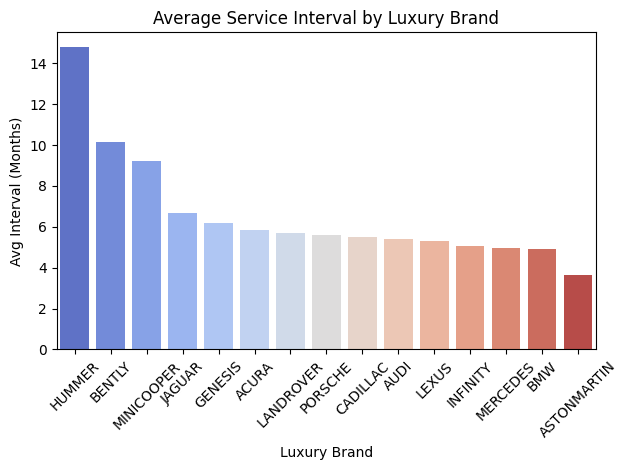

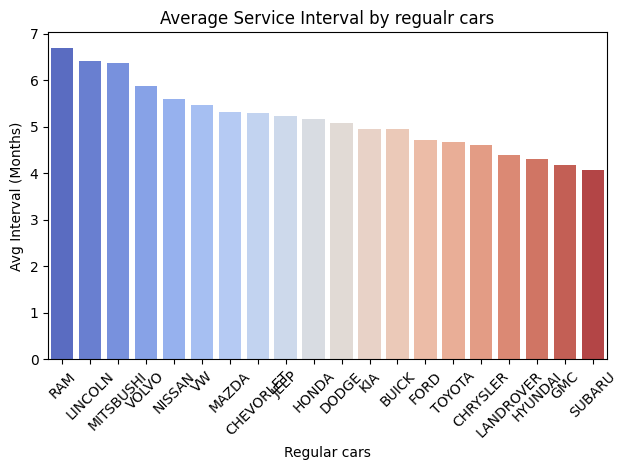

In [ ]:
luxury_df = df1_clean[df1_clean['is_luxury'] == True]
top_lux = luxury_df['full_name'].value_counts().head(15).index

lux_avg = (
    luxury_df[luxury_df['full_name'].isin(top_lux)]
    .groupby('full_name')['interval_in_months']
    .mean()
    .reset_index()
    .sort_values(by='interval_in_months', ascending=False)
)

sns.barplot(data=lux_avg, x='full_name', y='interval_in_months', hue= 'full_name', legend=False,palette='coolwarm')
plt.title('Average Service Interval by Luxury Brand')
plt.xlabel('Luxury Brand')
plt.ylabel('Avg Interval (Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
luxury_df = df1_clean[df1_clean['is_luxury'] == False]
top_lux = luxury_df['full_name'].value_counts().head(20).index

lux_avg = (
    luxury_df[luxury_df['full_name'].isin(top_lux)]
    .groupby('full_name')['interval_in_months']
    .mean()
    .reset_index()
    .sort_values(by='interval_in_months', ascending=False)
)

sns.barplot(data=lux_avg, x='full_name', y='interval_in_months', hue= 'full_name', legend=False,palette='coolwarm')
figsize= (20,20)
plt.title('Average Service Interval by regualr cars')
plt.xlabel('Regular cars')
plt.ylabel('Avg Interval (Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

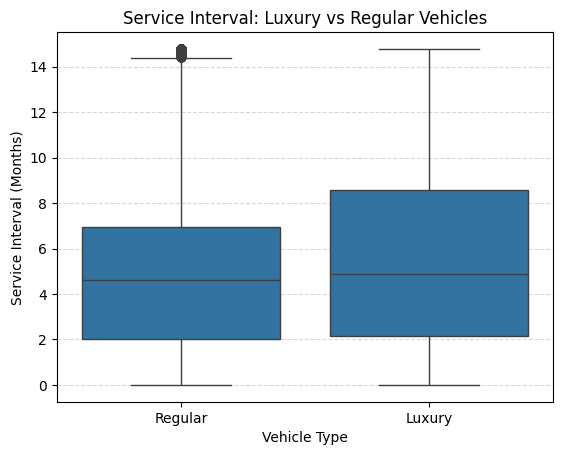

In [ ]:
sns.boxplot(x='is_luxury', y='interval_in_months', data=df1_clean)
plt.xticks([0, 1], ['Regular', 'Luxury'])
plt.title('Service Interval: Luxury vs Regular Vehicles')
plt.xlabel('Vehicle Type')
plt.ylabel('Service Interval (Months)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


<Figure size 1500x1500 with 0 Axes>

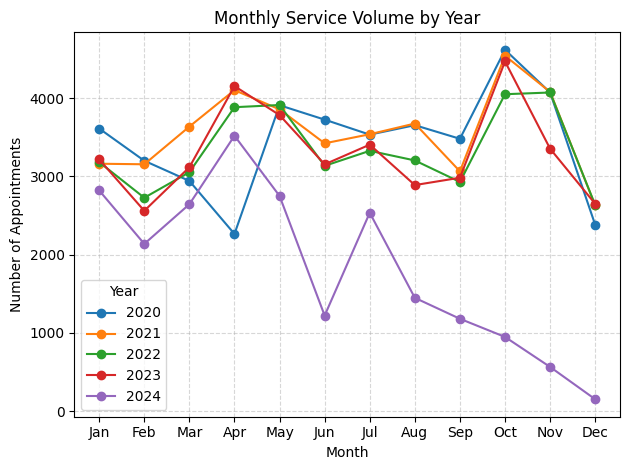

In [ ]:

df1_clean['service_date'] = pd.to_datetime(df1_clean['service_date'])


# Extract year and month name
df1_clean['year'] = df1_clean['service_date'].dt.year
df1_clean['month'] = df1_clean['service_date'].dt.month
df1_clean['month_name'] = df1_clean['service_date'].dt.strftime('%b')  # Jan, Feb, etc.

# Group by year and month
monthly_volume = df1_clean.groupby(['year', 'month'])['vin'].count().reset_index(name='appointments')

# Pivot: months as rows, years as columns
pivot_df = monthly_volume.pivot(index='month', columns='year', values='appointments')

# Sort by calendar order (Jan = 1)
pivot_df = pivot_df.sort_index()

# Plot
plt.figure(figsize=(15, 15))
pivot_df.plot(marker='o')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Service Volume by Year')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


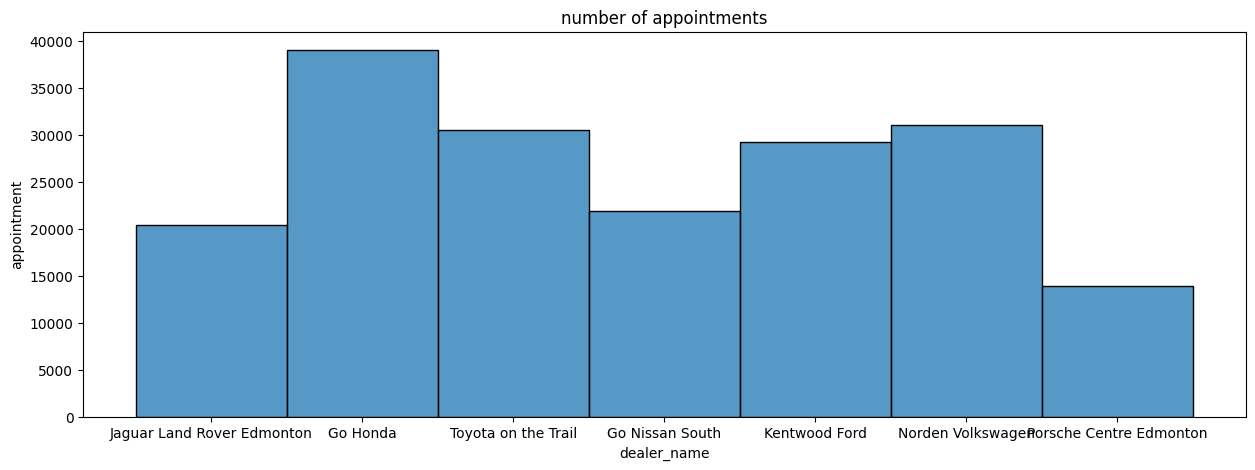

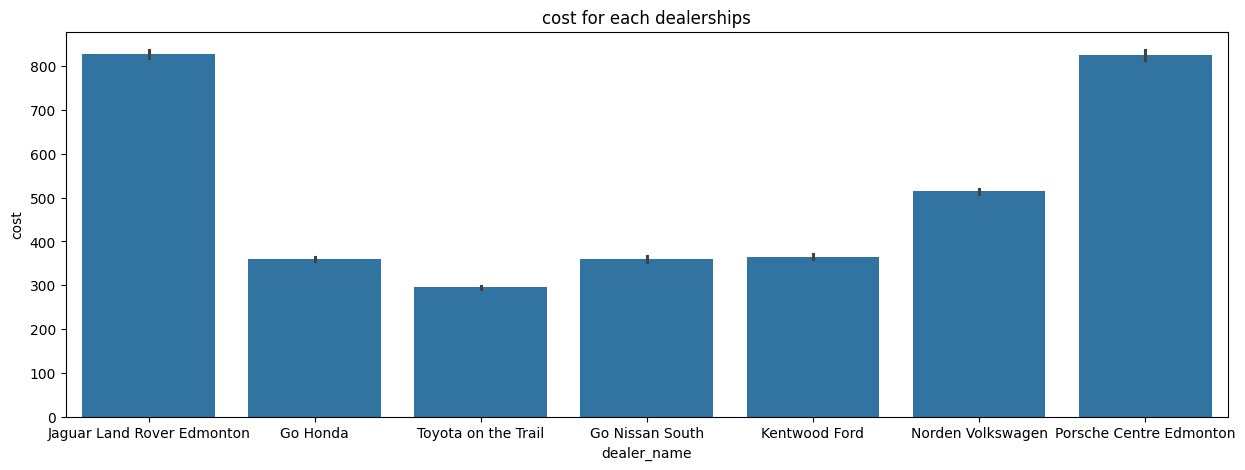

In [ ]:
#plot histogram for appointment and dealer_name

plt.figure(figsize=(15, 5))
sns.histplot(x='dealer_name',data=df1_clean)
plt.xlabel('dealer_name')
plt.ylabel('appointment')
plt.title('number of appointments')
plt.show()
# Preparing Box plot between is_luxury and interval_in_months
plt.figure(figsize=(15, 5))
sns.barplot(x='dealer_name', y='cost', data=df1_clean)
plt.xlabel('dealer_name')
plt.ylabel('cost')
plt.title('cost for each dealerships')
plt.show()

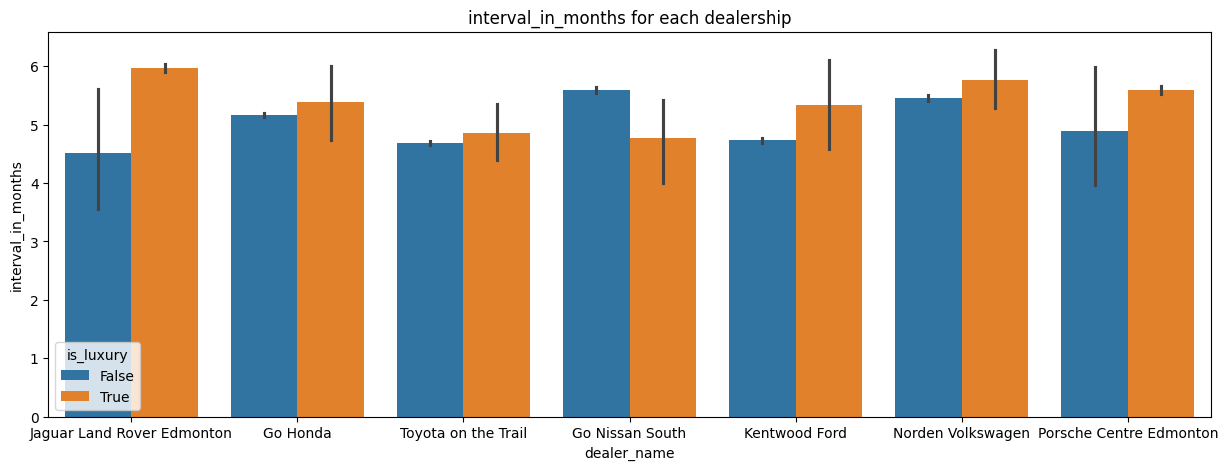

In [ ]:
#compare luxury vs non luxury service based on dealerships in barplot
plt.figure(figsize=(15, 5))
sns.barplot(x='dealer_name', y='interval_in_months', hue='is_luxury', data=df1_clean)
plt.xlabel('dealer_name')
plt.ylabel('interval_in_months')
plt.title('interval_in_months for each dealership')
plt.show()

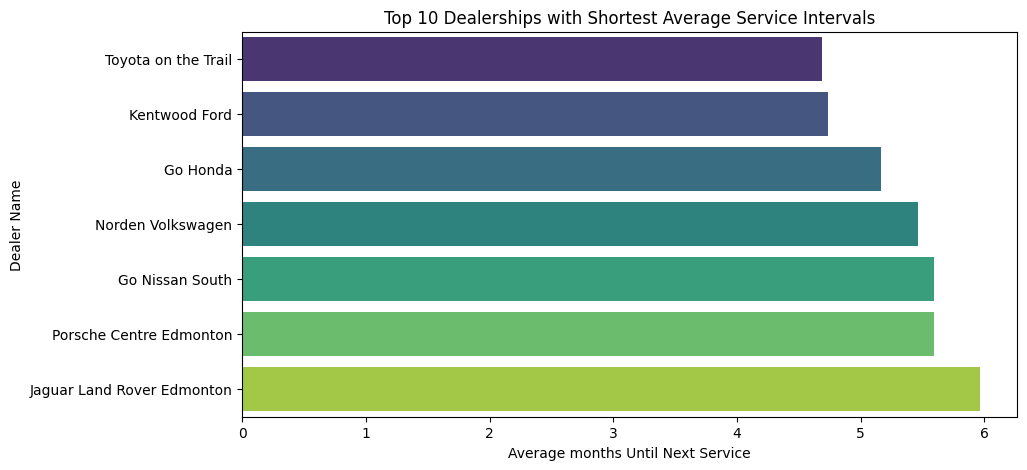

In [ ]:
top_dealers = (
    df1_clean.groupby('dealer_name')['interval_in_months']
    .mean()
    .sort_values()
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_dealers.values, y=top_dealers.index, palette='viridis', hue= top_dealers.index)

plt.title('Top 10 Dealerships with Shortest Average Service Intervals')
plt.xlabel('Average months Until Next Service')
plt.ylabel('Dealer Name')
plt.show()

In [ ]:
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, df['mileage'].max()]
labels = ['0–25k', '25–50k', '50–75k', '75–100k', '100–150k', '150–200k', '200–300k', '300k+']

# Creating new categorical column
mileage_class= pd.cut(df1_clean['mileage'], bins=bins, labels=labels, include_lowest=True)

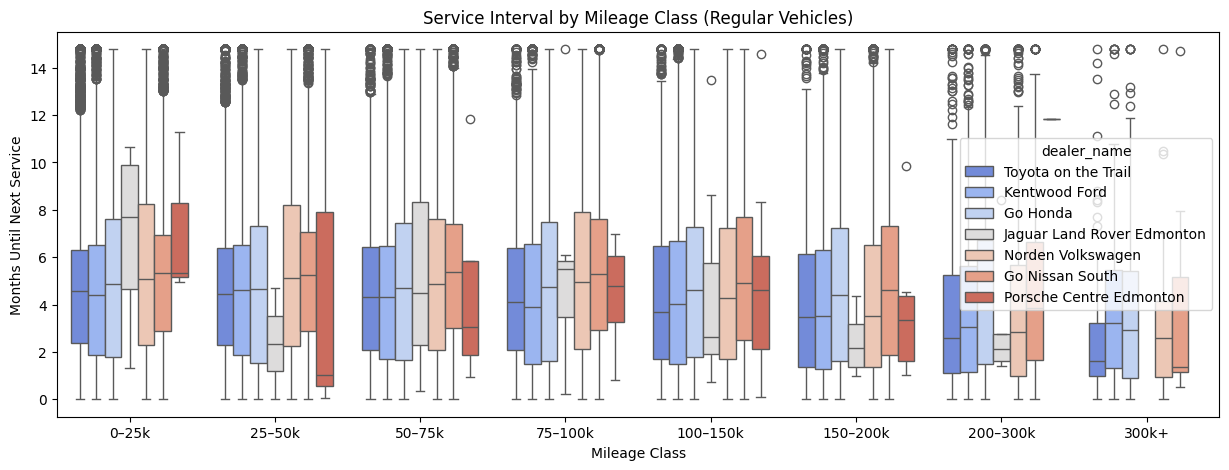

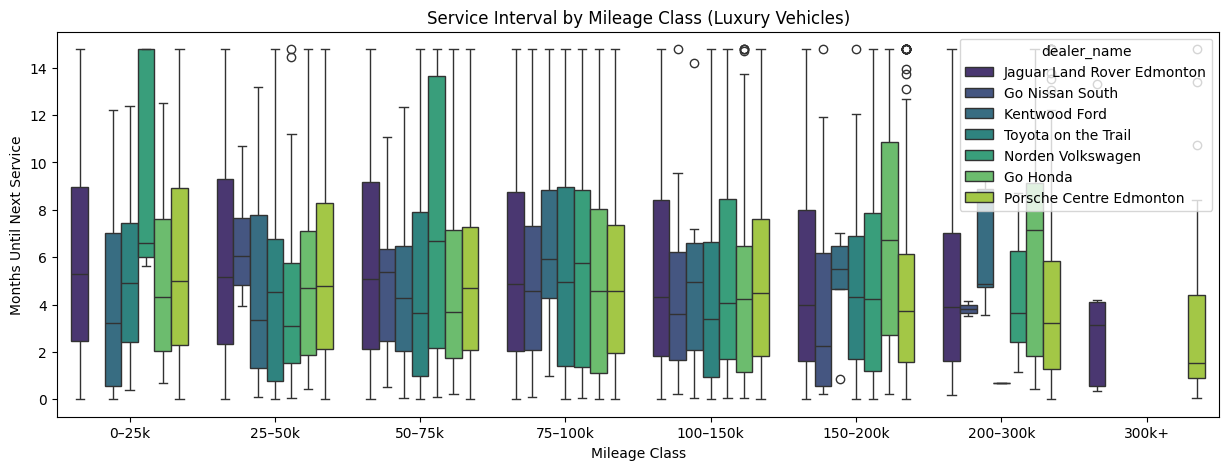

In [ ]:
df_regular = df1_clean[df1_clean['is_luxury'] == 0]
df_luxury  = df1_clean[df1_clean['is_luxury'] == 1]

#Regular vehicles
plt.figure(figsize=(15,5))
sns.boxplot(x=mileage_class, y='interval_in_months', data=df_regular,hue = 'dealer_name', palette='coolwarm')
plt.title('Service Interval by Mileage Class (Regular Vehicles)')
plt.xlabel('Mileage Class')
plt.ylabel('Months Until Next Service')
plt.show()

#Luxury vehicles
plt.figure(figsize=(15,5))
sns.boxplot(x=mileage_class, y='interval_in_months', data=df_luxury,hue = 'dealer_name', palette='viridis')
plt.title('Service Interval by Mileage Class (Luxury Vehicles)')
plt.xlabel('Mileage Class')
plt.ylabel('Months Until Next Service')
plt.show()

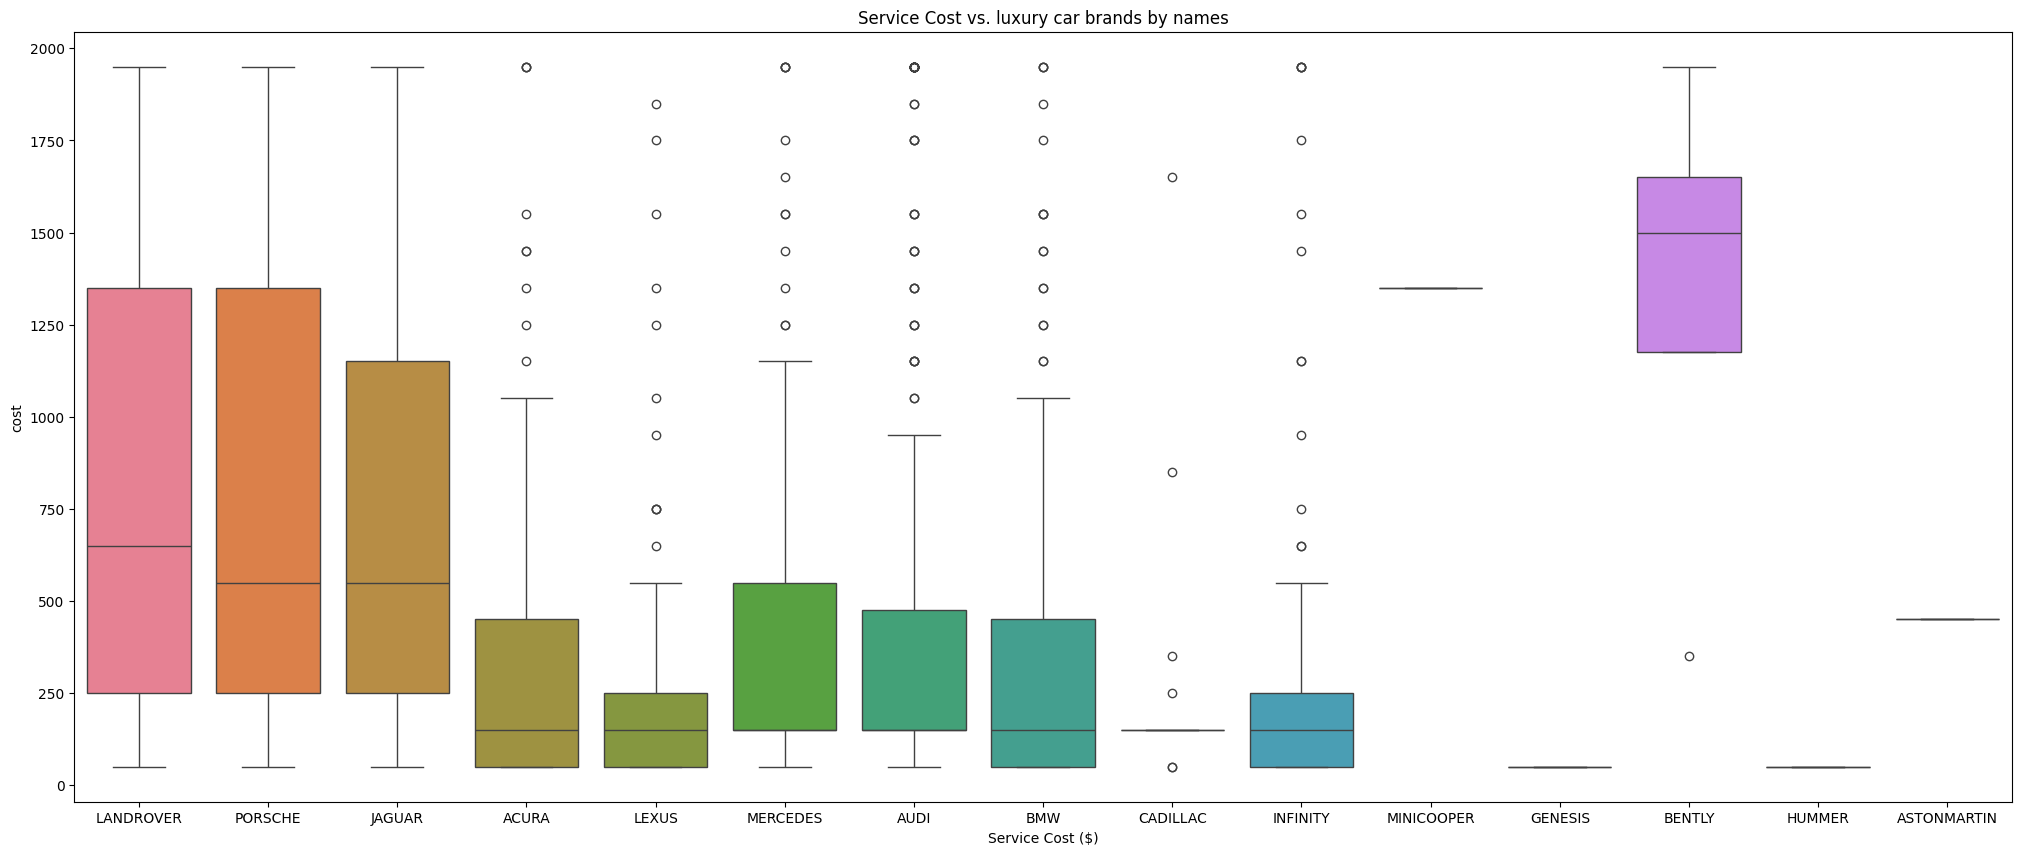

In [ ]:
#service cost for luxury brands by names
plt.figure(figsize=(25,10))
sns.boxplot(x='full_name', y='cost',data=df_luxury, hue = 'full_name')
plt.title('Service Cost vs. luxury car brands by names')
plt.xlabel('Service Cost ($)')
plt.ylabel('cost')


plt.show()

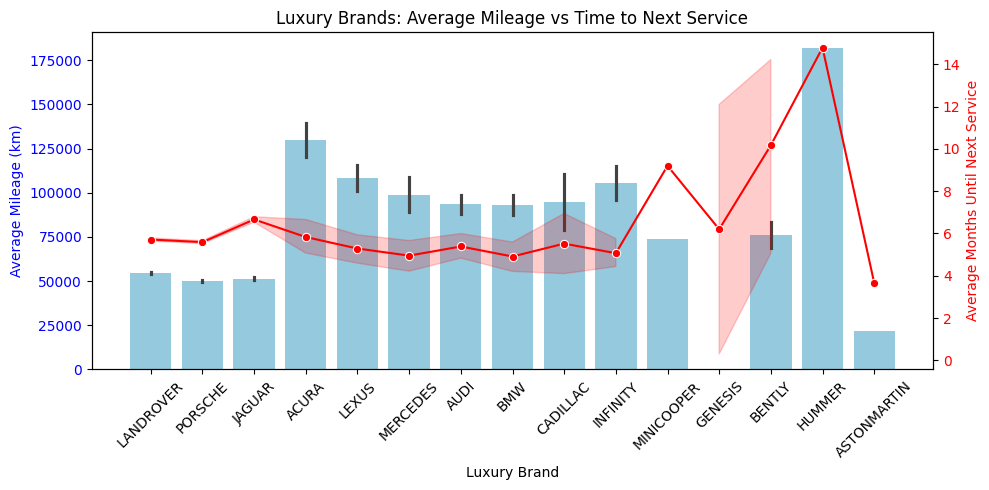

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for average mileage
sns.barplot(x='full_name', y='mileage', data=df_luxury, ax=ax1, color='skyblue')
ax1.set_ylabel('Average Mileage (km)', color='blue')
ax1.set_xlabel('Luxury Brand')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Luxury Brands: Average Mileage vs Time to Next Service')

# Add line plot for average service gap
ax2 = ax1.twinx()
sns.lineplot(x='full_name', y='interval_in_months', data=df_luxury, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Months Until Next Service', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# **Dropping Unwanted Features and Creating Separate Data Files**


1.   Reviewing Data Columns: The head() and columns commands are used to quickly review the first few rows and confirm which columns are present in the cleaned dataset. This helps verify that all transformations and corrections have been successfully applied.

2.   Creating a Working Copy: A new copy of the cleaned DataFrame is created and stored in a variable named df2. This ensures that the original df1_clean dataset remains intact, preventing accidental modifications during final adjustments.

3.   Segmenting Data by Vehicle Type: The dataset is divided into two separate DataFrames based on the is_luxury column:
*    luxury_df - Contains records of all luxury vehicles.
*    regular_df - Contains records of all non-luxury (regular) vehicles.
his segmentation allows targeted analysis for each vehicle category, such as cost patterns or maintenance frequency.

4.   Exporting Final Datasets: Both subsets are exported to CSV files using the to_csv() function:
*    luxury_df.to_csv('luxury_df.csv', index=False)
*    regular_df.to_csv('regular_df.csv', index=False)






In [ ]:
df1_clean.head(5)

,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance,full_name,is_luxury,next_service_date,interval_in_months,month,month_name
130345,2021-11-30,2021-05-01,1,1,2021,LAND,EVO,1000167976,No,50.0,True,14656.0,Jaguar Land Rover Edmonton,1.6,LANDROVER,True,2022-02-20,2.733333,11,Nov
202116,2022-02-20,2021-05-01,1,1,2022,LAND,EVO,1000167976,No,450.0,True,18253.0,Jaguar Land Rover Edmonton,1.8,LANDROVER,True,2022-10-10,7.733333,2,Feb
130334,2022-10-10,2021-05-01,1,0,2022,LAND,EVO,1000167976,Yes,650.0,True,33194.0,Jaguar Land Rover Edmonton,1.2,LANDROVER,True,2023-06-20,8.433333,10,Oct
221000,2023-05-29,2022-06-01,1,0,2023,HOND,CRV,1000197869,Yes,150.0,True,9342.0,Go Honda,11.3,HONDA,False,2023-07-23,1.833333,5,May
35830,2023-07-23,2022-06-01,0,1,2023,HOND,CRV,1000197869,No,750.0,True,15255.0,Go Honda,10.8,HONDA,False,2024-04-10,8.733333,7,Jul


In [ ]:
df1_clean.columns

Index(['service_date', 'sale_date', 'customer_pay', 'warranty_pay', 'year',
       'make', 'model', 'vin', 'loyalty_card', 'cost', 'appointment',
       'mileage', 'dealer_name', 'distance', 'full_name', 'is_luxury',
       'next_service_date', 'interval_in_months', 'month', 'month_name'],
      dtype='object')

In [ ]:
df2 = df1_clean.copy()

In [ ]:
#make 2 different dataframes luxury_df and regular_df from df2
luxury_df = df2[df2['is_luxury'] == True]
regular_df = df2[df2['is_luxury'] == False]

In [ ]:
#download luxury_df and regular_df into csv
luxury_df.to_csv('luxury_df.csv', index=False)
regular_df.to_csv('regular_df.csv', index=False)

# **Neccessary conversions**
After data cleaning and segmentation, the next step was to build predictive models for the regular car segment to estimate the service interval in months.



1.   Data Type Conversion:Several columns were converted to appropriate data types to ensure consistency and compatibility with machine learning algorithms:


*   customer_pay, cost, and mileage were converted from float to integer.
*   service_date and next_service_date were converted to datetime format.
*   New columns service_month and service_year were extracted from the service_date column to capture temporal patterns.


2.   Feature Selection: Unnecessary or irrelevant columns were dropped from the dataset. The remaining features in X represent the predictors, while the target variable y is interval_in_months, indicating the time gap between two services.

3.   Categorical Encoding: Categorical variables like full_name and model were label-encoded using LabelEncoder from scikit-learn to convert them into numerical form suitable for model training.

4.   Train-Test Split: The dataset was split into training (80%) and testing (20%) subsets using train_test_split.
This ensures that model evaluation is based on unseen data, allowing for a fair performance assessment.

5.  Model Selection: Models were chosen for regression analysis:-

*   Linear Regression
*   Random Forest Regressor
*   Decision tree regressor






In [ ]:
#convert float into int
df2['customer_pay'] = df2['customer_pay'].astype(int)
df2['cost'] = df2['cost'].astype(int)
df2['mileage'] = df2['mileage'].astype(int)
df2['is_luxury'] = df2['is_luxury'].astype(int)

In [ ]:
#convert next service date into datetime
df2['next_service_date'] = pd.to_datetime(df2['next_service_date'])
df2['service_date'] = pd.to_datetime(df2['service_date'])

In [ ]:
df2['service_month'] = df2['service_date'].dt.month
df2['service_year'] = df2['service_date'].dt.year

In [ ]:
X = df2.drop(['cost','make','vin','sale_date','loyalty_card','appointment','dealer_name','distance', 'interval_in_months','customer_pay','warranty_pay','next_service_date','service_date', 'month_name','month','year'], axis=1)
y = df2['interval_in_months']

In [ ]:
#encode full_name
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['full_name'] = le.fit_transform(X['full_name'])

In [ ]:
# encode model_column
X['model'] = le.fit_transform(X['model'])


In [ ]:
#checking training and testing data size.
print(X_train.shape)
print(X_test.shape)

(148870, 6)
(37218, 6)


In [ ]:
X.head(5)

,model,mileage,full_name,is_luxury,service_month,service_year
130345,287,14656,22,1,11,2021
202116,287,18253,22,1,2,2022
130334,287,33194,22,1,10,2022
221000,237,9342,15,0,5,2023
35830,237,15255,15,0,7,2023


In [ ]:
y.head(5)

,interval_in_months
130345,2.733333
202116,7.733333
130334,8.433333
221000,1.833333
35830,8.733333


In [ ]:
#split train
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#get random forest, linear and evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# **Model Training and Evaluation**
**To identify the best model for predicting service intervals in regular cars, four machine learning algorithms were implemented and compared:
Linear Regression, Random Forest Regressor, XGBoost Regressor, and Decision Tree Regressor.**

1.  Linear Regression: The Linear Regression model was trained using the preprocessed training data.After fitting the model, predictions were generated and evaluated using the following metrics:
- Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
- Root Mean Squared Error (RMSE): Gives an interpretable error measure in the same units as the target variable.
- R² Score: Indicates how well the model explains the variability of the target variable.

2.  Random Forest Regressor: The Random Forest Regressor, an ensemble learning technique that combines multiple decision trees, was trained to capture non-linear patterns in the data.
*   After training, its performance was evaluated using the same metrics (MSE, RMSE, and R²).
*   Feature importance scores were also calculated and visualized using a bar chart, allowing for interpretation of which variables most strongly influenced the prediction of service intervals.

3.   XGBoost Regressor: To further optimize model performance, an XGBoost Regressor was implemented with hyperparameter tuning using GridSearchCV.The grid search tested combinations of parameters such as:
*   Number of estimators (n_estimators)
*   Tree depth (max_depth)
*   Learning rate (learning_rate)
*   Sampling ratios (subsample and colsample_bytree)

The best parameter combination and corresponding R² score were identified automatically through cross-validation, ensuring a robust and unbiased model selection process.

4.   Decision Tree Regressor: Finally, a Decision Tree Regressor was trained to compare performance with ensemble-based approaches.
Although simple, this model helps in understanding the direct effect of feature splits and serves as a benchmark for more advanced models like Random Forest and XGBoost.

**Model Comparison Summary**: Each model's results (MSE, RMSE, and R²) were compared to determine which approach best predicts service intervals.

*   Linear Regression provided a baseline with limited flexibility.
*   Random Forest and XGBoost likely offered superior accuracy by handling non-linear relationships.
*   Decision Tree performed moderately but was useful for interpretability.



# **LinearRegression_Testing**

In [ ]:
modelr =LinearRegression()


In [ ]:
# Convert datetime columns to timestamps after splitting


modelr.fit(X_train, y_train)

LinearRegression()

In [ ]:
data_predict = modelr.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, data_predict)
print('mse',mse)
rmse = np.sqrt(mse)
print('rmse',rmse)
r2 = r2_score(y_train, data_predict)
print('r2',r2)

mse 15.694720673515002
rmse 3.9616563043145225
r2 0.016820889468666778


# **RandomForest_Testing**

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
pred = rf.predict(X_train)

In [ ]:
msse = mean_squared_error(y_train, pred)
print('mse',msse)
rmse = np.sqrt(msse)
print('rmse',rmse)
r2 = r2_score(y_train, pred)
print('r2',r2)

mse 2.8256916949926096
rmse 1.6809793856536759
r2 0.8229875443398758


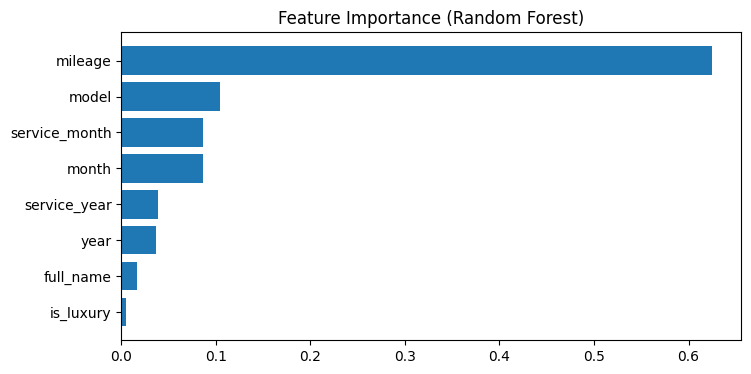

In [ ]:
importances = rf.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,4))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Predictionns = decision_tree_model.predict(X_train)
RR2 = r2_score(y_train, Predictionns)
print('RR2',RR2)
print('MSE', mean_squared_error(y_train, Predictionns))
print('RMSE', np.sqrt(mean_squared_error(y_train, Predictionns)))

RR2 0.9669120288044766
MSE 0.5281911098440705
RMSE 0.7267675762195713


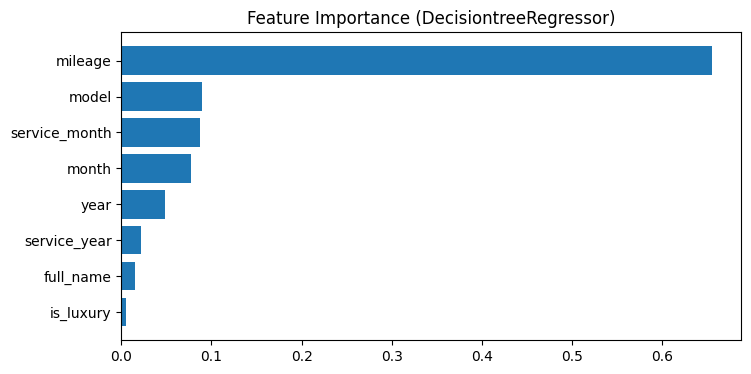

In [ ]:
importances = decision_tree_model.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,4))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance (DecisiontreeRegressor)')
plt.show()